In [20]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# 1. Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Run K-Means (we know there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add results back to see how it did
df['cluster'] = clusters
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [21]:
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

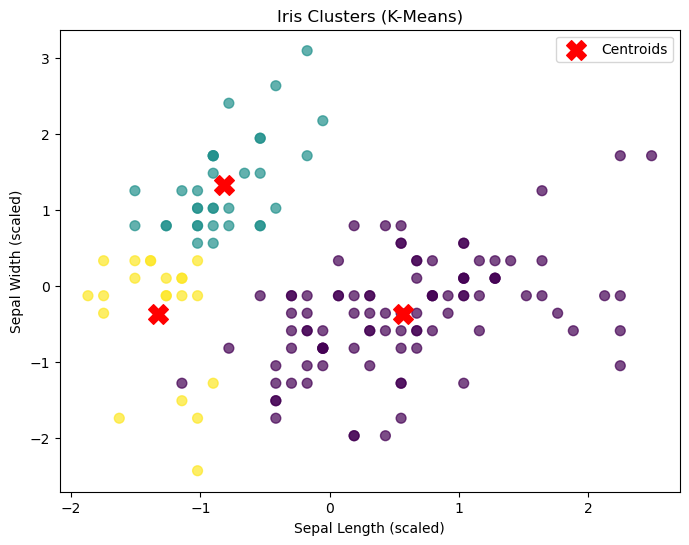

In [22]:
import matplotlib.pyplot as plt

# We pick the first two columns: Sepal Length (0) and Sepal Width (1)
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their cluster label
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)

# Plot the centroids (the center of each cluster)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Iris Clusters (K-Means)')
plt.legend()
plt.show()

## Comparing Sepal vs Petal Features in K-Means Clustering

Let's plot the clusters using petal length and petal width, side by side with the sepal plot, to see which features separate the clusters better.

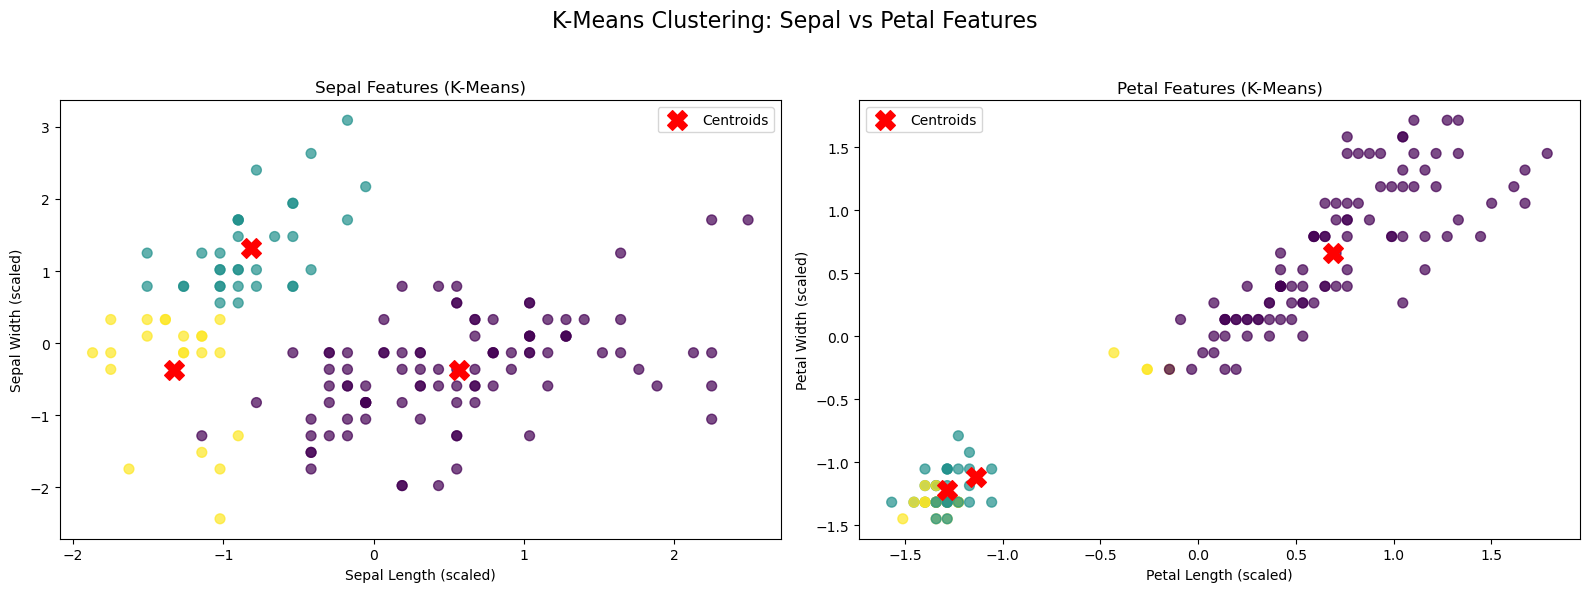

In [23]:
# Plot Sepal (left) and Petal (right) features side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sepal: Sepal Length vs Sepal Width
axes[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[0].set_xlabel('Sepal Length (scaled)')
axes[0].set_ylabel('Sepal Width (scaled)')
axes[0].set_title('Sepal Features (K-Means)')
axes[0].legend()

# Petal: Petal Length vs Petal Width
axes[1].scatter(scaled_data[:, 2], scaled_data[:, 3], c=clusters, cmap='viridis', s=50, alpha=0.7)
axes[1].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', s=200, marker='X', label='Centroids')
axes[1].set_xlabel('Petal Length (scaled)')
axes[1].set_ylabel('Petal Width (scaled)')
axes[1].set_title('Petal Features (K-Means)')
axes[1].legend()

plt.suptitle('K-Means Clustering: Sepal vs Petal Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Comparing K-Means Clusters to True Species Labels

Let's visualize how well the K-means clusters match the actual species in the iris dataset. We'll plot the true labels using petal features for a direct comparison.

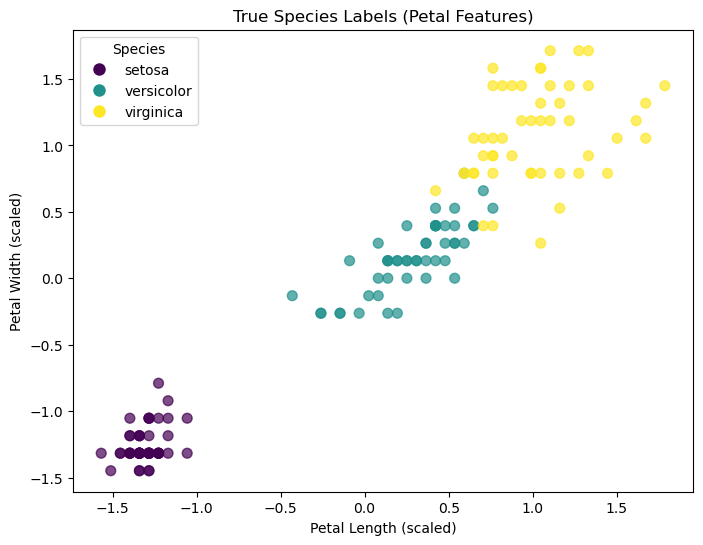

In [24]:
# Plot true species labels using petal features
import numpy as np

species = iris.target  # 0, 1, 2 for the three species
species_names = iris.target_names

plt.figure(figsize=(8, 6))
scatter = plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=species, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('True Species Labels (Petal Features)')
# Create legend using unique species
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=species_names[i],
                          markerfacecolor=plt.cm.viridis(i/2), markersize=10) for i in range(3)]
plt.legend(handles=legend_elements, title="Species")
plt.show()

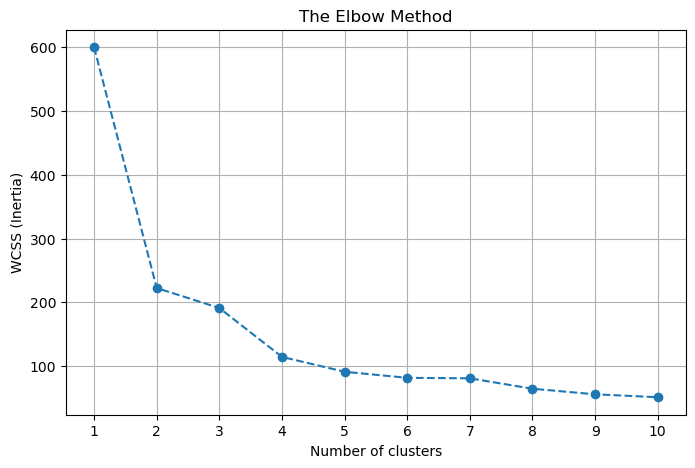

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 'scaled_data' is from our previous StandardScaler step
wcss = []

# Test 1 to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) # Inertia is the WCSS

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()